In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Steel_industry_data.csv")

In [3]:
df.head()

date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0  01/01/2018 00:15       3.17                                  2.95   
1  01/01/2018 00:30       4.00                                  4.46   
2  01/01/2018 00:45       3.24                                  3.28   
3  01/01/2018 01:00       3.31                                  3.56   
4  01/01/2018 01:15       3.82                                  4.50   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                   0.0        0.0   
1                                   0.0        0.0   
2                                   0.0        0.0   
3                                   0.0        0.0   
4                                   0.0        0.0   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor   NSM  \
0                         73.21                         100.0   900   
1                         66.77                         100.0  1800   
2                         70.28                         100.0  2700   
3                         68.09                         100.0  3600   
4                         64.72                         100.0  4500   

  WeekStatus Day_of_week   Load_Type  
0    Weekday      Monday  Light_Load  
1    Weekday      Monday  Light_Load  
2    Weekday      Monday  Light_Load  
3    Weekday      Monday  Light_Load  
4    Weekday      Monday  Light_Load

In [4]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df.iloc[:,8] = label_encoder.fit_transform(df.iloc[:,8])
df.iloc[:,9] = label_encoder.fit_transform(df.iloc[:,9])
df.iloc[:,10] = label_encoder.fit_transform(df.iloc[:,10])

In [5]:
### split dataset into independent and dependent features

y=df.iloc[:,10]
x=df.iloc[:,[1,3,5,7,8,9]]

In [6]:
x

Usage_kWh  Leading_Current_Reactive_Power_kVarh  \
0           3.17                                  0.00   
1           4.00                                  0.00   
2           3.24                                  0.00   
3           3.31                                  0.00   
4           3.82                                  0.00   
...          ...                                   ...   
35035       3.85                                  0.00   
35036       3.74                                  0.00   
35037       3.78                                  0.07   
35038       3.78                                  0.11   
35039       3.67                                  0.07   

       Lagging_Current_Power_Factor    NSM  WeekStatus  Day_of_week  
0                             73.21    900           0            1  
1                             66.77   1800           0            1  
2                             70.28   2700           0            1  
3                             68.09   3600           0            1  
4                             64.72   4500           0            1  
...                             ...    ...         ...          ...  
35035                         62.10  82800           0            1  
35036                         70.71  83700           0            1  
35037                         76.62  84600           0            1  
35038                         77.72  85500           0            1  
35039                         77.22      0           0            1  

[35040 rows x 6 columns]

In [7]:
y

0        0
1        0
2        0
3        0
4        0
        ..
35035    0
35036    0
35037    0
35038    0
35039    0
Name: Load_Type, Length: 35040, dtype: int32

In [8]:
x = np.linspace(-5.0, 5.0, 100)
y = np.sqrt(10**2 - x**2)
y=np.hstack([y,-y])
x=np.hstack([x,-x])

In [9]:
x1 = np.linspace(-5.0, 5.0, 100)
y1 = np.sqrt(5**2 - x1**2)
y1=np.hstack([y1,-y1])
x1=np.hstack([x1,-x1])

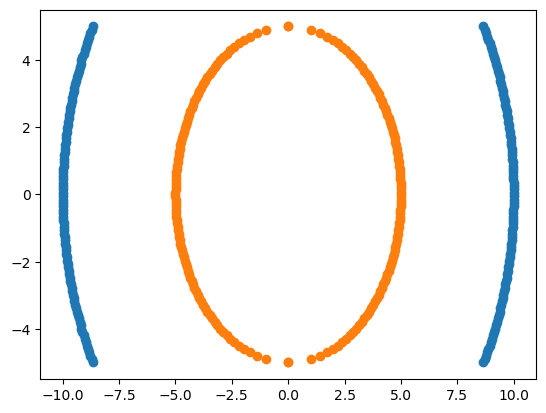

In [10]:
plt.scatter(y,x)
plt.scatter(y1,x1)

In [11]:

df1 =pd.DataFrame(np.vstack([y,x]).T,columns=['X1','X2'])
df1['Y']=0
df2 =pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2'])
df2['Y']=1
df = df1.append(df2)
df.head(5)

C:\Users\Admin\AppData\Local\Temp\ipykernel_7612\3433183721.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2)


X1       X2  Y
0  8.660254 -5.00000  0
1  8.717792 -4.89899  0
2  8.773790 -4.79798  0
3  8.828277 -4.69697  0
4  8.881281 -4.59596  0

In [12]:
### Independent and Dependent features
X = df.iloc[:, :2]  
y = df.Y

In [13]:
y

0      0
1      0
2      0
3      0
4      0
      ..
195    1
196    1
197    1
198    1
199    1
Name: Y, Length: 400, dtype: int64

In [14]:
## Split the dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [15]:

y_train

50     1
63     0
112    1
159    0
83     1
      ..
123    1
192    0
117    0
47     0
172    0
Name: Y, Length: 300, dtype: int64

In [16]:
from sklearn.svm import SVC
classifier=SVC(kernel="rbf")
classifier.fit(X_train,y_train)

SVC()

In [17]:
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [18]:

df.head()

X1       X2  Y
0  8.660254 -5.00000  0
1  8.717792 -4.89899  0
2  8.773790 -4.79798  0
3  8.828277 -4.69697  0
4  8.881281 -4.59596  0

In [19]:
# We need to find components for the Polynomical Kernel
#X1,X2,X1_square,X2_square,X1*X2
df['X1_Square']= df['X1']**2
df['X2_Square']= df['X2']**2
df['X1*X2'] = (df['X1'] *df['X2'])
df.head()

X1       X2  Y  X1_Square  X2_Square      X1*X2
0  8.660254 -5.00000  0  75.000000  25.000000 -43.301270
1  8.717792 -4.89899  0  75.999898  24.000102 -42.708375
2  8.773790 -4.79798  0  76.979390  23.020610 -42.096467
3  8.828277 -4.69697  0  77.938476  22.061524 -41.466150
4  8.881281 -4.59596  0  78.877155  21.122845 -40.818009

In [20]:
### Independent and Dependent features
X = df[['X1','X2','X1_Square','X2_Square','X1*X2']]
y = df['Y']

In [21]:
y

0      0
1      0
2      0
3      0
4      0
      ..
195    1
196    1
197    1
198    1
199    1
Name: Y, Length: 400, dtype: int64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,  random_state = 0)

In [23]:
X_train

X1        X2  X1_Square  X2_Square      X1*X2
50   4.999745  0.050505  24.997449   0.002551   0.252512
63   9.906589  1.363636  98.140496   1.859504  13.508984
112 -3.263736  3.787879  10.651974  14.348026 -12.362637
159 -9.953852 -0.959596  99.079176   0.920824   9.551676
83   3.680983  3.383838  13.549638  11.450362  12.455852
..        ...       ...        ...        ...        ...
123 -4.223140  2.676768  17.834915   7.165085 -11.304366
192 -9.031653 -4.292929  81.570758  18.429242  38.772248
117 -9.445795  3.282828  89.223038  10.776962 -31.008922
47   9.996811 -0.252525  99.936231   0.063769  -2.524447
172 -9.738311 -2.272727  94.834711   5.165289  22.132526

[300 rows x 5 columns]

In [24]:
import plotly.express as px

fig = px.scatter_3d(df, x='X1', y='X2', z='X1*X2',
              color='Y')
fig.show()

In [25]:
fig = px.scatter_3d(df, x='X1_Square', y='X1_Square', z='X1*X2',
              color='Y')
fig.show()

In [26]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0